# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# formatting the output
pd.options.display.float_format= '{:.2f}'.format

In [2]:
path = r"C:\Users\MSII\OneDrive\Desktop\Internship Elevvo\LEVEL 2\TASK4\Data\kaggle_survey_2017_2021.csv"
df = pd.read_csv(path)

In [3]:
df= df.replace({'â€™': "'", 'â€œ': '"', 'â€•': '"'}, regex=True)

In [4]:
df.nunique()

-                                          7
Time from Start to Finish (seconds)    12778
Q1                                        12
Q2                                        10
Q3                                        78
                                       ...  
Q38_B_Part_6                               2
Q38_B_Part_7                               2
Q38_B_Part_9                               2
Q38_B_Part_11                              1
Q38_B_OTHER                                2
Length: 293, dtype: int64

# 2. Initial Data Exploration (EDA)

In [5]:
df.sample(5)
df.shape

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
13327,2021,433,22-24,Man,Other,Master's degree,Research Scientist,1-3 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95471,2017,NaN,22-24,Male,Other,Bachelor's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10259,2021,936,40-44,Man,United Arab Emirates,Master's degree,Data Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82333,2018,428,25-29,Female,United States of America,Master's degree,Business Analyst,1-2 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74018,2018,1260,22-24,Male,India,Master's degree,Other,< 1 year,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(106302, 293)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [7]:
df.describe()
df.shape

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,106302,89586,105857,106207,106181,103319,99088,92786,65943,20885,...,2212,2761,1128,1022,7439,1287,1218,1186,1,629
unique,7,12778,12,10,78,10,36,21,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,394,25-29,Male,India,Master's degree,Student,3-5 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,23926,105,23748,49178,25192,43668,21242,15995,65942,20884,...,2211,2760,1127,1021,7438,1286,1217,1185,1,628


(106302, 293)

In [8]:
df.isna().sum()
df.duplicated().sum()

-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
                                        ...  
Q38_B_Part_6                           105015
Q38_B_Part_7                           105084
Q38_B_Part_9                           105116
Q38_B_Part_11                          106301
Q38_B_OTHER                            105673
Length: 293, dtype: int64

4456

# 3. Data Cleaning

In [9]:
questions = df.iloc[0,:]
questions


-                                                                                   Year
Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
                                                             ...                        
Q38_B_Part_6                           In the next 2 years, do you hope to become mor...
Q38_B_Part_7                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 293,

In [10]:
print(list(questions))

['Year', 'Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++', 'What program

In [11]:
df.drop(df.index[0],inplace = True) 

In [12]:
df.duplicated().sum()

4456

In [13]:
df = df.drop_duplicates()
df.shape

(101845, 293)

In [14]:
df.nunique()

-                                          6
Time from Start to Finish (seconds)    12777
Q1                                        11
Q2                                         9
Q3                                        77
                                       ...  
Q38_B_Part_6                               1
Q38_B_Part_7                               1
Q38_B_Part_9                               1
Q38_B_Part_11                              0
Q38_B_OTHER                                1
Length: 293, dtype: int64

In [15]:
df.shape

(101845, 293)

In [16]:
df.shape

(101845, 293)

In [17]:
df.nunique()

-                                          6
Time from Start to Finish (seconds)    12777
Q1                                        11
Q2                                         9
Q3                                        77
                                       ...  
Q38_B_Part_6                               1
Q38_B_Part_7                               1
Q38_B_Part_9                               1
Q38_B_Part_11                              0
Q38_B_OTHER                                1
Length: 293, dtype: int64

## Rename Columns

In [18]:
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
1,2021,910,50-54,Man,India,Bachelor's degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Master's degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Master's degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df.rename(columns={
    '-': 'Year',
    'Q1': 'Age_Group',
    'Q2': "Gender",
    "Q3": 'Country',
    'Q4': 'Education',
    'Q5': 'Job_Title',
    'Q6': 'Programming_Experience',
    'Q8': 'Recommended_Language',
    'Q13': 'TPU_Usage_Frequency',
    'Q14_Part_1': 'Data_Visualization_Tools',
    'Q15': 'ML_Experience_Years',
    'Q23': 'Employer_ML_Adoption',
    'Q25': 'Annual_Salary_USD'
})

In [20]:
df.head()

,Year,Time from Start to Finish (seconds),Age_Group,Gender,Country,Education,Job_Title,Programming_Experience,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
1,2021,910,50-54,Man,India,Bachelor's degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Master's degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Master's degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Programming Languages

In [21]:

df = df.rename(columns={
    "Q7_Part_1": "Python",
    "Q7_Part_2": "R",
    "Q7_Part_3": "SQL",
    "Q7_Part_4": "C",
    "Q7_Part_5": "C++",
    "Q7_Part_6": "Java",
    "Q7_Part_7": "Javascript",
    "Q7_Part_8": "Julia",
    "Q7_Part_9": "Swift",
    "Q7_Part_10": "Bash",
    "Q7_Part_11": "MATLAB",
})


language_cols = ["Python","R","SQL","C","C++","Java","Javascript","Julia","Swift","Bash","MATLAB"]


df_languages = df[language_cols].copy()


language_counts = df_languages.stack().value_counts()
print("Language counts:")
print(language_counts)


Language counts:
Python                   65942
SQL                      33090
R                        20884
Java                     14402
C++                      11618
C                         9696
Javascript                9501
MATLAB                    9320
Bash                      8737
Javascript/Typescript     3249
Julia                      797
Swift                      440
Name: count, dtype: int64


## Year

In [22]:
df['Year'].nunique()

6

In [23]:
df['Year'] = df['Year'].astype(str).str.strip()

df['Year'] = df['Year'].replace({'2021 ': '2021'})   
df['Year'] = df['Year'].astype(int)

In [24]:
df['Year'].value_counts()

Year
2021    25973
2018    23841
2020    20017
2019    19713
2017    12301
Name: count, dtype: int64

## Gender

In [25]:
gender_mapping = {
    'Male': 'Male',
    'Man': 'Male',
    'Female': 'Female',
    'Woman': 'Female'
   
}


df['Gender'] = df['Gender'].map(gender_mapping)

df['Gender'] = df['Gender'].fillna('Other')

df['Gender'].value_counts()

Gender
Male      81588
Female    18328
Other      1929
Name: count, dtype: int64

## Country

In [26]:
# If you want to print all unique countries:
print("\n--- Country ---")
print(df['Country'].dropna().unique())


--- Country ---
['India' 'Indonesia' 'Pakistan' 'Mexico' 'Russia' 'Turkey' 'Australia'
 'Nigeria' 'Greece' 'Belgium' 'Japan' 'Egypt' 'Singapore' 'Brazil'
 'Poland' 'China' 'Iran, Islamic Republic of...'
 'United States of America' 'Italy' 'Viet Nam' 'Israel' 'Peru'
 'South Africa' 'Other' 'Spain' 'Bangladesh'
 'United Kingdom of Great Britain and Northern Ireland' 'France'
 'Switzerland' 'Algeria' 'Tunisia' 'Argentina' 'Sweden' 'Colombia'
 'I do not wish to disclose my location' 'Canada' 'Chile' 'Netherlands'
 'Ukraine' 'Saudi Arabia' 'Romania' 'Morocco' 'Austria' 'Taiwan' 'Kenya'
 'Belarus' 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Denmark' 'Germany'
 'South Korea' 'Philippines' 'Sri Lanka' 'United Arab Emirates' 'Uganda'
 'Ghana' 'Malaysia' 'Thailand' 'Nepal' 'Kazakhstan' 'Ethiopia' 'Iraq'
 'Ecuador' 'Norway' 'Czech Republic' 'Republic of Korea' 'Hungary'
 'New Zealand' 'Finland' 'United States' 'United Kingdom'
 "People 's Republic of China" 'Iran' 'Hong Kong' 'Republic of China'


In [27]:
country_mapping = {
    'United States Of America': 'United States',
    'United States of America': 'United States',
    'United States': 'United States',
    'United Kingdom Of Great Britain And Northern Ireland': 'United Kingdom',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Kingdom': 'United Kingdom',
    'UK': 'United Kingdom',
    'Iran, Islamic Republic Of...': 'Iran',
    'Iran, Islamic Republic of...': 'Iran',
    'Iran': 'Iran',
    'I do not wish to disclose my location' : 'I Prefer Not To Say',
    'I do not wish to disclose my location': 'I Prefer Not To Say',
    'Other': 'I Prefer Not To Say',
    'Russia': 'Russia',
    'Viet Nam': 'Vietnam',
    "People \'S Republic Of China": 'China',
    "People 's Republic of China": 'China',
    'Republic of China': 'China',
  
    'China': 'China',
    'Hong Kong (S.A.R.)':'Hong Kong',
    'Republic of Korea' : 'South Korea',
    'Republic of Korea': 'South Korea'
}


df['Country'] = df['Country'].replace(country_mapping)

In [28]:
print("\n--- Country ---")
print(df['Country'].dropna().unique())


--- Country ---
['India' 'Indonesia' 'Pakistan' 'Mexico' 'Russia' 'Turkey' 'Australia'
 'Nigeria' 'Greece' 'Belgium' 'Japan' 'Egypt' 'Singapore' 'Brazil'
 'Poland' 'China' 'Iran' 'United States' 'Italy' 'Vietnam' 'Israel' 'Peru'
 'South Africa' 'I Prefer Not To Say' 'Spain' 'Bangladesh'
 'United Kingdom' 'France' 'Switzerland' 'Algeria' 'Tunisia' 'Argentina'
 'Sweden' 'Colombia' 'Canada' 'Chile' 'Netherlands' 'Ukraine'
 'Saudi Arabia' 'Romania' 'Morocco' 'Austria' 'Taiwan' 'Kenya' 'Belarus'
 'Ireland' 'Portugal' 'Hong Kong' 'Denmark' 'Germany' 'South Korea'
 'Philippines' 'Sri Lanka' 'United Arab Emirates' 'Uganda' 'Ghana'
 'Malaysia' 'Thailand' 'Nepal' 'Kazakhstan' 'Ethiopia' 'Iraq' 'Ecuador'
 'Norway' 'Czech Republic' 'Hungary' 'New Zealand' 'Finland']


In [29]:
arab_countries = [
    'Egypt', 'Saudi Arabia', 'Algeria', 'Tunisia', 'Morocco', 'Iraq', 'United Arab Emirates'
]

asia_non_arab = [
    'India', 'Indonesia', 'Pakistan', 'Japan', 'China', 'Vietnam', 'Bangladesh',
    'Singapore', 'South Korea', 'Philippines', 'Sri Lanka', 'Malaysia', 'Thailand',
    'Nepal', 'Kazakhstan', 'Taiwan', 'Hong Kong'
]

europe = [
    'Russia', 'Turkey', 'Greece', 'Belgium', 'Poland', 'Italy', 'France', 'Switzerland',
    'Netherlands', 'Ukraine', 'Romania', 'Sweden', 'Denmark', 'Germany', 'Austria',
    'Czech Republic', 'Hungary', 'Finland', 'Norway', 'Ireland', 'Portugal', 'Belarus'
]

americas = [
    'Mexico', 'Brazil', 'Peru', 'Argentina', 'Chile', 'Canada', 'United States'
]

africa_non_arab = [
    'Nigeria', 'South Africa', 'Kenya', 'Uganda', 'Ghana', 'Ethiopia'
]

oceania = [
    'Australia', 'New Zealand'
]


def get_region(country):
    if country in arab_countries:
        return 'Arab Countries'
    elif country in asia_non_arab:
        return 'Asia (Non-Arab)'
    elif country in europe:
        return 'Europe'
    elif country in americas:
        return 'Americas'
    elif country in africa_non_arab:
        return 'Africa (Non-Arab)'
    elif country in oceania:
        return 'Oceania'



df['Region'] = df['Country'].apply(get_region)

## Salary

In [30]:
df['Annual_Salary_USD'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999', '> $500,000', '300,000-500,000', '10-20,000',
       '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [31]:

salary_mapping = {
    '$0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-399,999': 350000,
    '300,000-499,999': 400000,
    '400,000-499,999': 450000,
    '500,000-999,999': 750000,
    '> $500,000': 500000,
    '>$1,000,000': 1000000,
    'I Do Not Wish To Disclose My Approximate Yearly Compensation': None
}

In [32]:
df['Salary_Midpoint'] = df['Annual_Salary_USD'].map(salary_mapping)

In [33]:
df.head()

,Year,Time from Start to Finish (seconds),Age_Group,Gender,Country,Education,Job_Title,Programming_Experience,Python,R,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Region,Salary_Midpoint
1,2021,910,50-54,Male,India,Bachelor's degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),27500.00
2,2021,784,50-54,Male,Indonesia,Master's degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),65000.00
3,2021,924,22-24,Male,Pakistan,Master's degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),500.00
4,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Americas,35000.00
5,2021,781,45-49,Male,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),35000.00


## Job_Title

In [34]:
df['Job_Title'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer', 'Product/Project Manager', nan,
       'Not employed', 'Consultant', 'Research Assistant',
       'Chief Officer', 'Manager', 'Developer Advocate',
       'Marketing Analyst', 'Principal Investigator', 'Salesperson',
       'Data Journalist', 'Operations Research Practitioner',
       'Computer Scientist', 'Software Developer/Software Engineer',
       'Engineer', 'Scientist/Researcher', 'Researcher',
       'Predictive Modeler', 'Programmer', 'Data Miner'], dtype=object)

In [35]:
job_title_map = {

  
    "Software Developer/Software Engineer": "Software Engineer",
    "Programmer": "Software Engineer",


    
    "Machine Learning Engineer": "Machine Learning Engineer",
    "Statistician": "Statistician",
    "Predictive Modeler": "Data Scientist",
    "nan": "Other",

   
    "Program/Project Manager": "Project Manager",
    "Product/Project Manager": "Project Manager",
    "Product Manager": "Product Manager",
    "Business Analyst": "Business Analyst",
    "Marketing Analyst": "Business Analyst",

    
    
    "Scientist/Researcher": "Research Scientist",
    "Researcher": "Research Scientist",
    
    
    "Developer Relations/Advocacy": "Developer Advocate",
    "Developer Advocate": "Developer Advocate",

 
    "Currently not employed": "Unemployed",
    "Not employed": "Unemployed",

}
df["Job_Title"] = df["Job_Title"].map(job_title_map)

In [36]:
df['Job_Title'].unique()

array([nan, 'Project Manager', 'Unemployed', 'Machine Learning Engineer',
       'Business Analyst', 'Product Manager', 'Statistician',
       'Developer Advocate', 'Software Engineer', 'Research Scientist',
       'Data Scientist'], dtype=object)

## Programming_Experience

In [37]:
experience_mapping = {
    # --- 0 years experience ---
    'I Have Never Written Code': 'No Experience',
    'I have never written code': 'No Experience',
    'I Have Never Written Code But I Want To Learn': 'No Experience',
    'I have never written code but I want to learn': 'No Experience',
    'I Have Never Written Code And I Do Not Want To Learn': 'No Experience',
    'I have never written code and I do not want to learn': 'No Experience',
    "I Don'T Write Code To Analyze Data": 'No Experience',
    "I don't write code to analyze data": 'No Experience',

    # --- Less than a year ---
    '< 1 Years': '0-1 Years',
    '< 1 years': '0-1 Years',
    '< 1 Year': '0-1 Years',
    '< 1 year': '0-1 Years',
    'Less Than A Year': '0-1 Years',
    'Less than a year': '0-1 Years',

    # --- 1-2 / 1-3 years ---
    '1-2 Years': '1-3 Years',
    '1-2 years': '1-3 Years',
    '1 To 2 Years': '1-3 Years',
    '1 to 2 years': '1-3 Years',
    '1-3 Years': '1-3 Years',
    '1-3 years': '1-3 Years',

    # --- 3-5 years ---
    '3-5 Years': '3-5 Years',
    '3-5 years': '3-5 Years',
    '3 To 5 Years': '3-5 Years',
    '3 to 5 years': '3-5 Years',

    # --- 5-10 years ---
    '5-10 Years': '5-10 Years',
    '5-10 years': '5-10 Years',
    '6 To 10 Years': '5-10 Years',
    '6 to 10 years': '5-10 Years',

    # --- 10+ years ---
    '10-20 Years': '10+ Years',
    '10-20 years': '10+ Years',
    '20+ Years': '10+ Years',
    '20+ years': '10+ Years',
    '20-30 Years': '10+ Years',
    '20-30 years': '10+ Years',
    '30-40 Years': '10+ Years',
    '30-40 years': '10+ Years',
    '40+ Years': '10+ Years',
    '40+ years': '10+ Years',
    'More Than 10 Years': '10+ Years',
    'More than 10 years': '10+ Years'
}

df['Programming_Experience'] = df['Programming_Experience'].replace(experience_mapping)

In [38]:
df['Programming_Experience'].unique()

array(['5-10 Years', '10+ Years', '1-3 Years', '0-1 Years', '3-5 Years',
       'No Experience', nan], dtype=object)

## Education

In [39]:
education_mapping = {
     "Professional Doctorate": "Doctoral Degree",
   'Professional doctorate': "Doctoral Degree",
   'Doctoral degree': "Doctoral Degree",
    "Some College/University Study Without Earning A Bachelor'S Degree": "Some College",
    "Some college/university study without earning a bachelor's degree":"Some College",
    "No Formal Education Past High School": "High School or Below",
    'No formal education past high school' : "High School or Below",
    "I Did Not Complete Any Formal Education Past High School": "High School or Below",
    'I did not complete any formal education past high school': "High School or Below",
    'nan' : 'I prefer not to answer'
}
df['Education'] = df['Education'].replace(education_mapping)
df['Education'].unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral Degree',
       'I prefer not to answer', 'Some College', 'High School or Below',
       'Professional degree', nan], dtype=object)

## Age

In [40]:
Age_mapping = {

    "18-21" : "18-25",
    "22-24" : "18-25", 
    "25-29" : "18-25",
    "30-34": "36-45", 
    "35-39" : "36-45",
    "40-44" : "36-45",
	"50-54": "46-55",
    "55-59":"60+",
    "60-69":"60+",
    "70+" : "60+"
}
df['Age_Group'] = df['Age_Group'].replace(Age_mapping)

In [41]:
df['Age_Group'].unique()

array(['46-55', '18-25', '45-49', '36-45', '60+', nan], dtype=object)

In [42]:
df['Age_Group'].isna().sum()

356

## Employer_ML_Adoption

In [43]:
df['Employer_ML_Adoption'].unique()

array(['No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'I do not know',
       'We use ML methods for generating insights (but do not put working models into production)',
       nan,
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)'],
      dtype=object)

In [44]:
ml_adoption_mapping = {
   
    'No (We Do Not Use Ml Methods)': 'No ML Usage',
    'No (we do not use ML methods)': 'No ML Usage',
   
    'We Use Ml Methods For Generating Insights (But Do Not Put Working Models Into Production)': 'ML for Insights Only',
    'We use ML methods for generating insights (but do not put working models into production)': 'ML for Insights Only',

    'We Are Exploring Ml Methods (And May One Day Put A Model Into Production)': 'Exploring ML',
    'We are exploring ML methods (and may one day put a model into production)': 'Exploring ML',
    
    'We Recently Started Using Ml Methods (I.E., Models In Production For Less Than 2 Years)': 'Recently Adopted ML',
    'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Recently Adopted ML',
   
    'We Have Well Established Ml Methods (I.E., Models In Production For More Than 2 Years)': 'Established ML',
     'We have well established ML methods (i.e., models in production for more than 2 years)': 'Established ML',

    'I Do Not Know': 'Unknown',
    'nan' : 'Unknown'
}


df['Employer_ML_Adoption'] = df['Employer_ML_Adoption'].replace(ml_adoption_mapping)

In [45]:
df['Employer_ML_Adoption'].unique()

array(['No ML Usage', 'Exploring ML', 'I do not know',
       'ML for Insights Only', nan, 'Established ML',
       'Recently Adopted ML'], dtype=object)

# 5. Data Visualization & 6. Insights & Recommendations

In [46]:
df.sample(5)

,Year,Time from Start to Finish (seconds),Age_Group,Gender,Country,Education,Job_Title,Programming_Experience,Python,R,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Region,Salary_Midpoint
62184,2019,78,18-25,Male,Taiwan,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),NaN
6925,2021,272,18-25,Female,India,Master's degree,NaN,0-1 Years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),NaN
53682,2019,1582,18-25,Male,Ukraine,Bachelor's degree,NaN,1-3 Years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,12500.00
52100,2019,3161,36-45,Male,India,Master's degree,NaN,3-5 Years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),27500.00
35869,2020,326,18-25,Male,India,Master's degree,NaN,0-1 Years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),NaN


## Age

In [47]:
df['Age_Group'].value_counts()


Age_Group
18-25    55832
36-45    33042
45-49     4866
60+       4318
46-55     3431
Name: count, dtype: int64

In [48]:
df_filtered_age = df[(df['Age_Group'] != 'nan')]

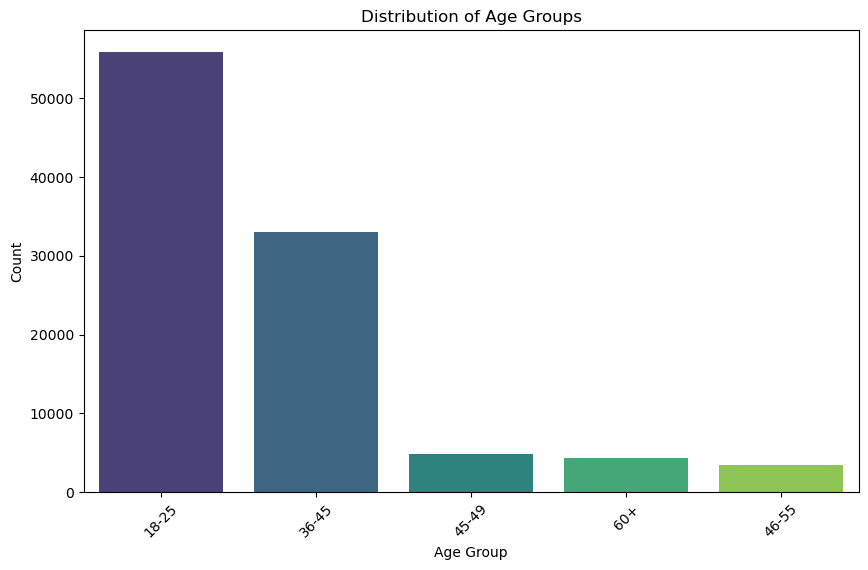

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered_age, x='Age_Group', order=df_filtered_age['Age_Group'].value_counts().index, palette='viridis')
plt.title('Distribution of Age Groups') 
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

In [50]:
df_filtered_age.groupby('Gender')['Age_Group'].value_counts()


Gender  Age_Group
Female  18-25        11372
        36-45         5441
        45-49          619
        46-55          438
        60+            386
Male    18-25        43557
        36-45        26964
        45-49         4142
        60+           3771
        46-55         2929
Other   18-25          903
        36-45          637
        60+            161
        45-49          105
        46-55           64
Name: count, dtype: int64

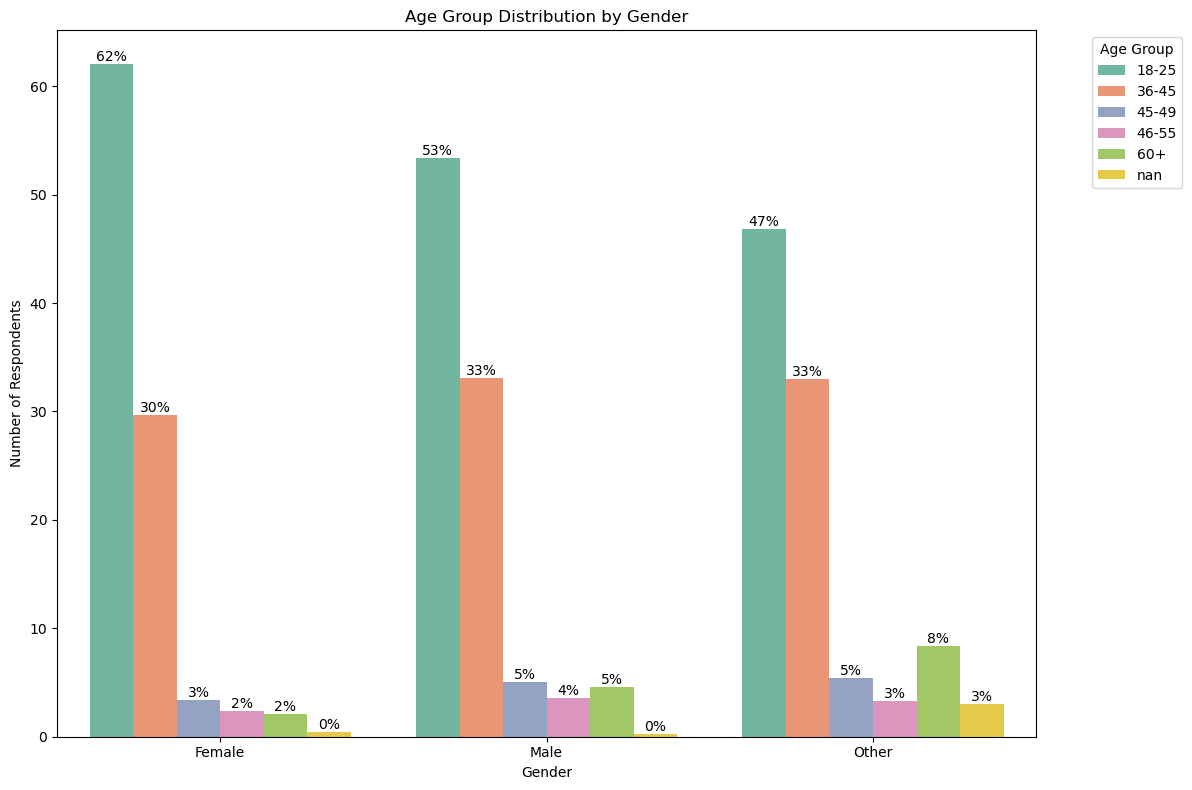

In [51]:
df_filtered_age['Age_Group'] = df_filtered_age['Age_Group'].astype(str)
age_gender_pct = df_filtered_age.groupby('Gender')['Age_Group'].value_counts(normalize=True) * 100

age_gender_df = age_gender_pct.reset_index(name='Count')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age_gender_df, x='Gender', y='Count', hue='Age_Group', palette='Set2')
            
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', fontsize=10,  )

plt.title('Age Group Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

## Gender

In [52]:
df_filtered = df[df['Gender'] != 'Other']
df_filtered['Gender'].value_counts()


Gender
Male      81588
Female    18328
Name: count, dtype: int64

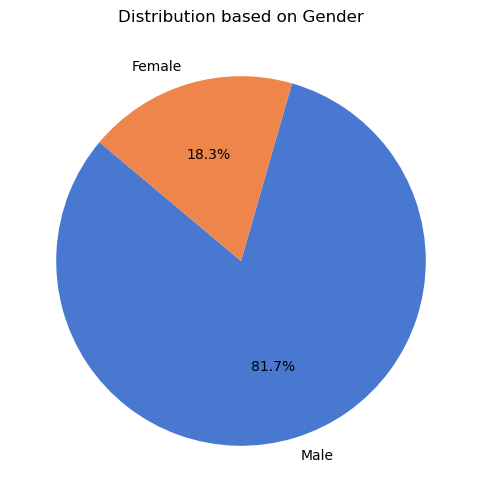

In [53]:
df_filtered_Other = df[df['Gender'] != 'Other']
plt.figure(figsize=(10,6))
plt.pie(df_filtered['Gender'].value_counts(), labels=df_filtered['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Distribution based on Gender')
plt.show();

## Job_Title

In [54]:
df['Job_Title'].value_counts().head(10)

Job_Title
Unemployed                   5422
Business Analyst             4128
Machine Learning Engineer    3104
Project Manager              2692
Software Engineer            1772
Statistician                 1428
Research Scientist           1374
Product Manager               319
Developer Advocate            216
Data Scientist                169
Name: count, dtype: int64

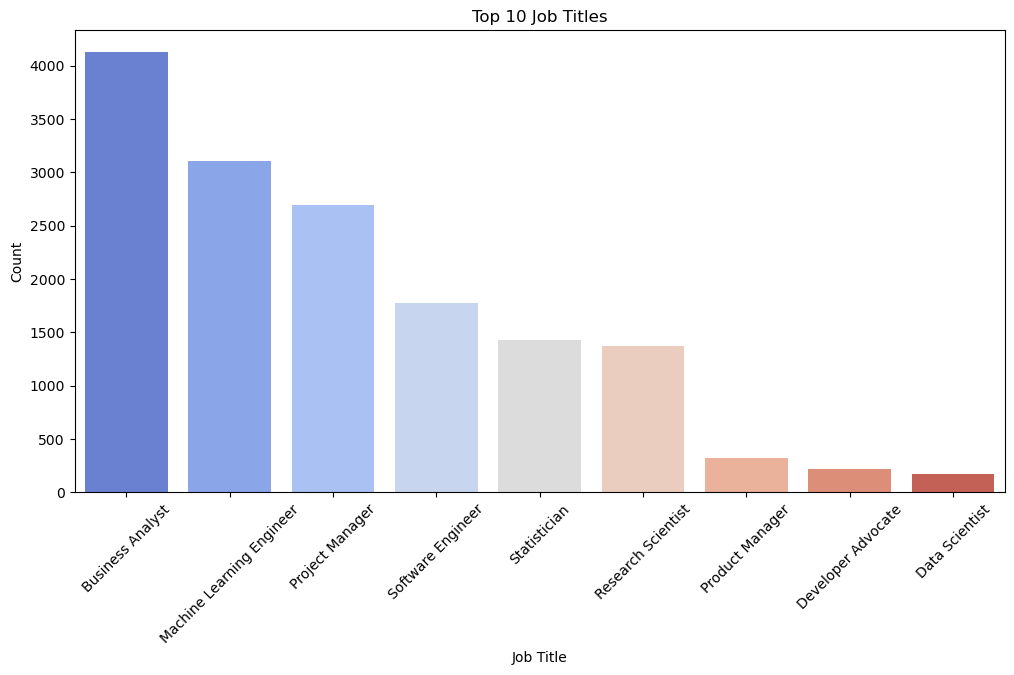

In [55]:
df_filtered_job = df[(df['Job_Title'] != 'Other') & (df['Job_Title'] != 'Student') & (df['Job_Title'] != 'Unemployed')]
Top_10_Jobs = df_filtered_job['Job_Title'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=Top_10_Jobs.index, y=Top_10_Jobs.values, palette='coolwarm')
plt.title('Top 10 Job Titles')  
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();


In [56]:
#df_filtered_3 = df[(df['Job_Title'] != 'Other') & (df['Job_Title'] != 'Student')& (df['Job_Title'] != 'Unemployed')]

top_5= df_filtered_job['Job_Title'].value_counts().head(5)


In [57]:
top_5_jobs = top_5.index.tolist()
df_top_5 = df[df['Job_Title'].isin(top_5_jobs)]

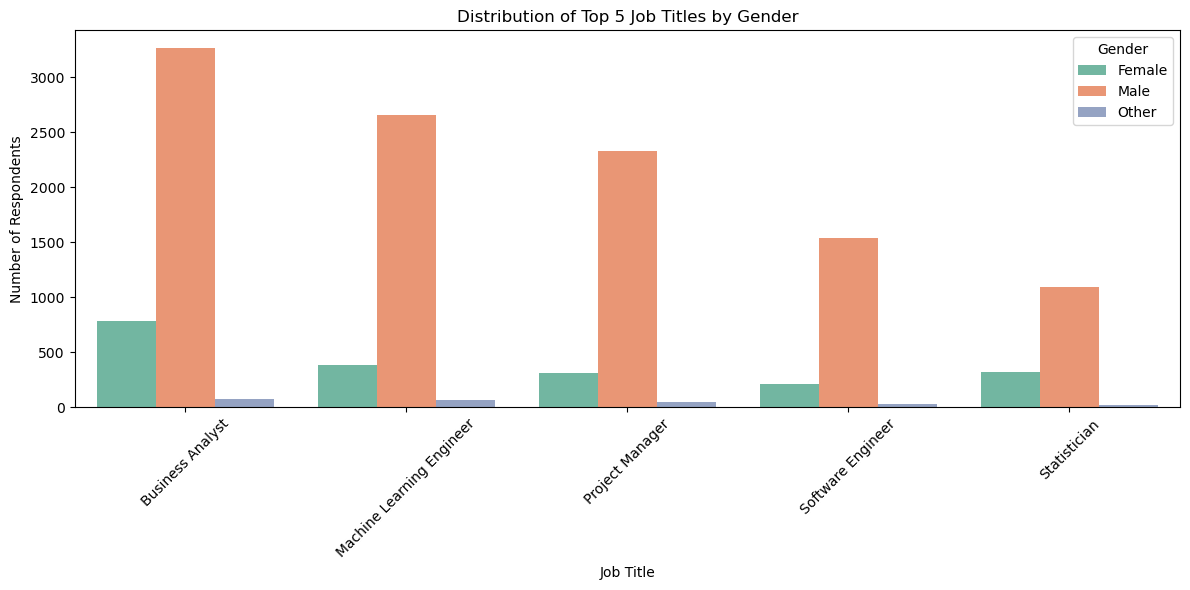

In [58]:
gender_job_distribution = df_top_5.groupby(['Job_Title', 'Gender']).size().unstack(fill_value=0)

gender_job_long = gender_job_distribution.reset_index().melt(id_vars='Job_Title', var_name='Gender', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_job_long, x='Job_Title', y='Count', hue='Gender', palette='Set2')

plt.title('Distribution of Top 5 Job Titles by Gender')
plt.xlabel('Job Title')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show();

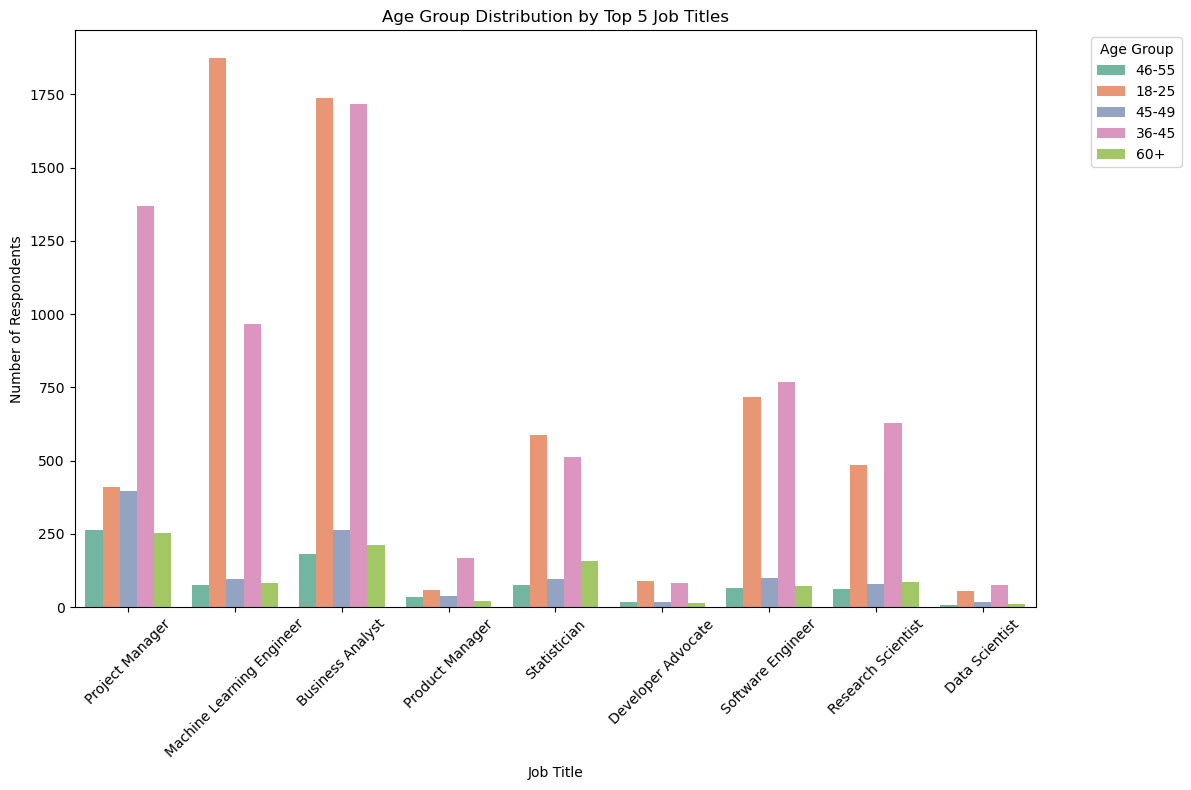

In [59]:
df_filtered_GJ = df[(df['Job_Title'] != 'Other') & (df['Job_Title'] != 'Student')& (df['Job_Title'] != 'Unemployed')&(df['Age_Group'] != 'nan')]
top_5 = df_filtered_GJ['Job_Title'].value_counts().head(5)


df_top_jobs = df_filtered_GJ[df_filtered_GJ['Job_Title'].isin(top_5.index)]


plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered_GJ, x='Job_Title', hue='Age_Group', palette='Set2')

plt.title('Age Group Distribution by Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

## Country

In [60]:
df['Country'].value_counts().head(15)

Country
India                  23936
United States          15191
I Prefer Not To Say     5994
China                   3891
Russia                  3299
Brazil                  3283
Japan                   3070
United Kingdom          2651
Germany                 2521
France                  2070
Canada                  2057
Spain                   1961
Nigeria                 1852
Turkey                  1498
Australia               1451
Name: count, dtype: int64

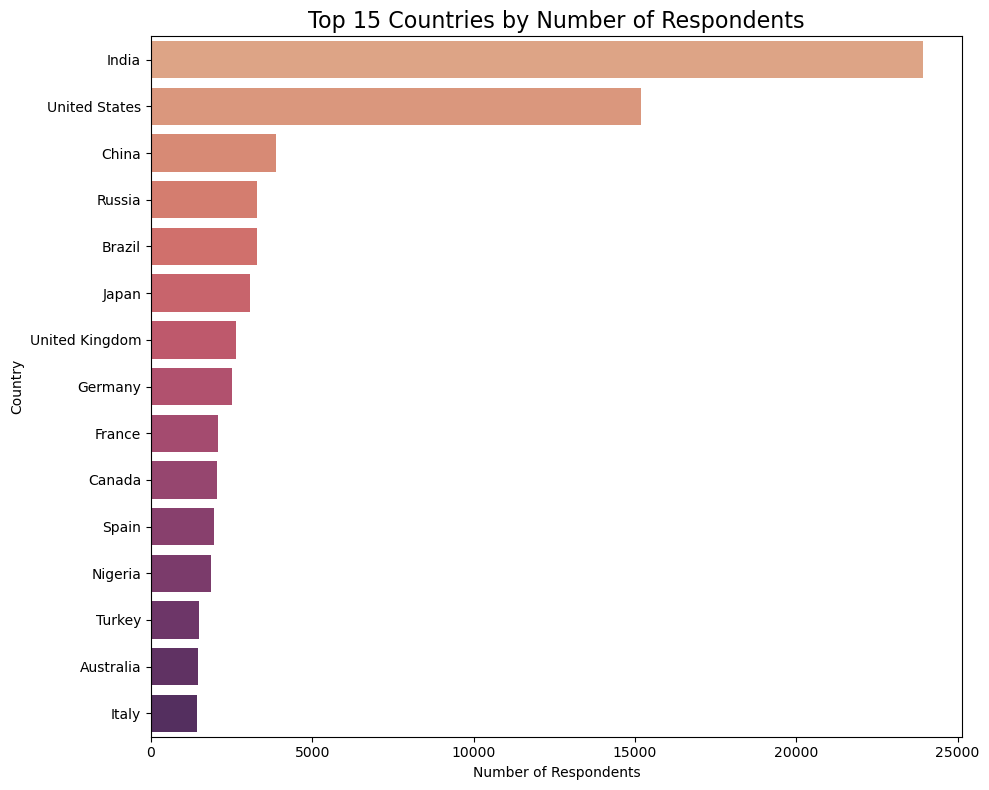

In [61]:
df_filtered = df[df['Country'] != 'I Prefer Not To Say']
top_countries = df_filtered['Country'].value_counts().head(15).index
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Country', order=top_countries, palette='flare')
plt.title("Top 15 Countries by Number of Respondents", fontsize=16)
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.tight_layout()
plt.show();

In [62]:
df['Region'].value_counts()

Region
Asia (Non-Arab)      40147
Americas             22973
Europe               18544
Africa (Non-Arab)     3422
Arab Countries        2288
Oceania               1649
Name: count, dtype: int64

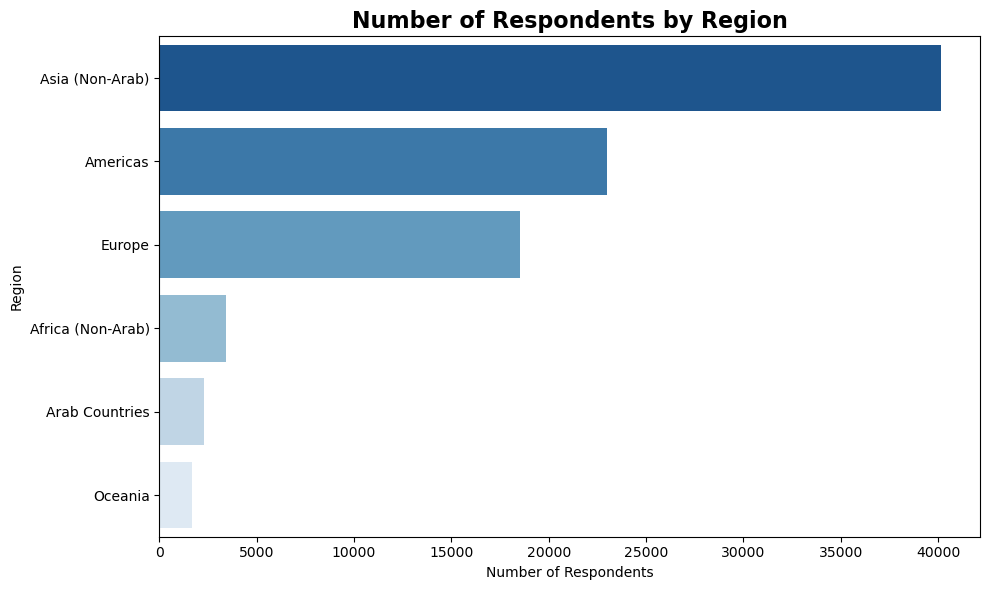

In [63]:
region_order = df['Region'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Region', order=region_order, palette='Blues_r')

plt.title("Number of Respondents by Region", fontsize=16, fontweight='bold')
plt.xlabel("Number of Respondents")
plt.ylabel("Region")
plt.tight_layout()
plt.show();

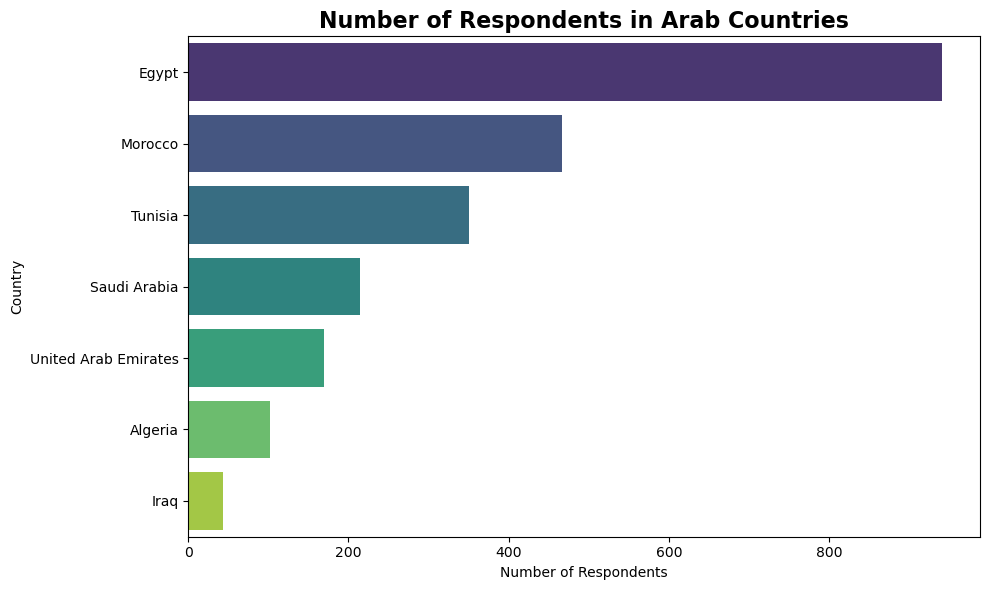

In [64]:
arab_df = df[df['Country'].isin(arab_countries)]
arab_df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=arab_df, y='Country', order=arab_df['Country'].value_counts().index, palette='viridis')
plt.title("Number of Respondents in Arab Countries", fontsize=16, fontweight='bold')
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.tight_layout()
plt.show();

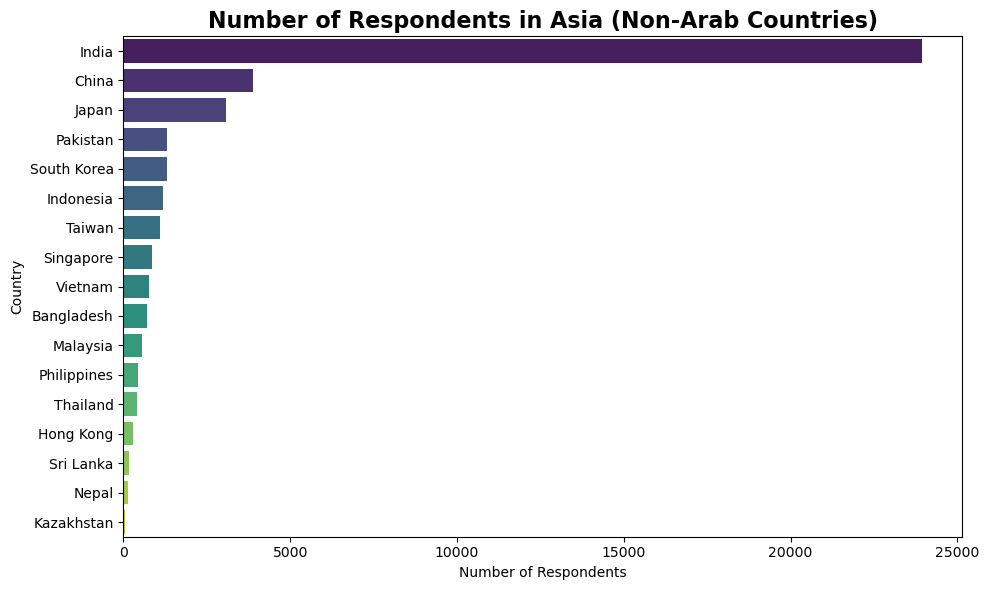

In [65]:
Asia_df = df[df['Country'].isin(asia_non_arab)]
Asia_df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=Asia_df, y='Country', order=Asia_df['Country'].value_counts().index, palette='viridis')
plt.title("Number of Respondents in Asia (Non-Arab Countries)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Respondents")
plt.ylabel("Country")
plt.tight_layout()
plt.show();

## Salary_Midpoint

In [66]:
df.head()

,Year,Time from Start to Finish (seconds),Age_Group,Gender,Country,Education,Job_Title,Programming_Experience,Python,R,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Region,Salary_Midpoint
1,2021,910,46-55,Male,India,Bachelor's degree,NaN,5-10 Years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),27500.00
2,2021,784,46-55,Male,Indonesia,Master's degree,Project Manager,10+ Years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),65000.00
3,2021,924,18-25,Male,Pakistan,Master's degree,NaN,1-3 Years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),500.00
4,2021,575,45-49,Male,Mexico,Doctoral Degree,NaN,10+ Years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Americas,35000.00
5,2021,781,45-49,Male,India,Doctoral Degree,NaN,0-1 Years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia (Non-Arab),35000.00


In [67]:
# Average salaries in the world
global_avg = df['Salary_Midpoint'].mean()

# Average salaries in Arab countries
arab_countries = ['Egypt', 'Saudi Arabia', 'Algeria', 'Tunisia',
                  'Morocco', 'Iraq', 'United Arab Emirates']
arab_avg = df[df['Country'].isin(arab_countries)]['Salary_Midpoint'].mean()

print(f"Average salaries in the world: ${global_avg:,.0f}")
print(f"Average salaries in Arab countries: ${arab_avg:,.0f}")

Average salaries in the world: $45,074
Average salaries in Arab countries: $19,813


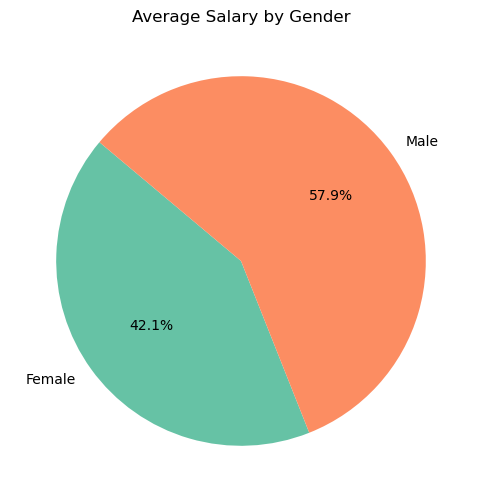

In [68]:
df_filtered = df[df['Gender'] != 'Other']
avg_salary_by_gender = df_filtered.groupby('Gender')['Salary_Midpoint'].mean()
plt.figure(figsize=(10, 6))
plt.pie(avg_salary_by_gender, labels=avg_salary_by_gender.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Average Salary by Gender')
plt.show();

In [69]:
df.groupby('Country')['Salary_Midpoint'].mean().sort_values(ascending=False).head(10)

Country
United States    118219.75
Switzerland      117571.22
Israel           110436.19
Australia         96288.53
Norway            89173.08
Denmark           84052.63
United Kingdom    76099.76
New Zealand       74788.46
Canada            73786.55
Germany           73169.79
Name: Salary_Midpoint, dtype: float64

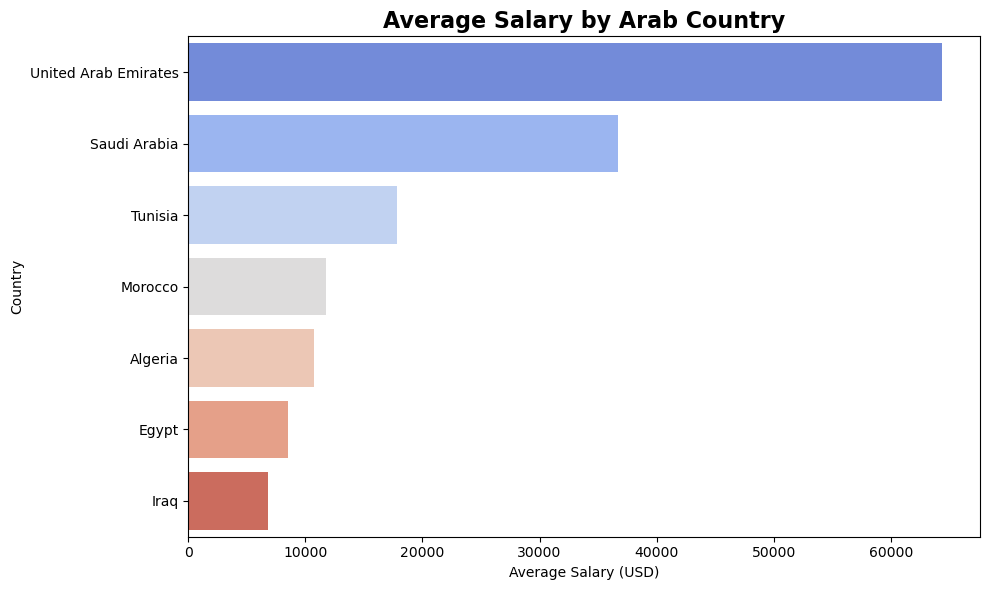

In [70]:
arab_df = df[df['Country'].isin(arab_countries)]
arab_df['Country'].value_counts()

avg_salary_by_country = arab_df.groupby('Country')['Salary_Midpoint'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_salary_by_country.reset_index(), y='Country', x='Salary_Midpoint', palette='coolwarm')
plt.title("Average Salary by Arab Country", fontsize=16, fontweight='bold')
plt.xlabel("Average Salary (USD)")
plt.ylabel("Country")

plt.tight_layout()
plt.show();

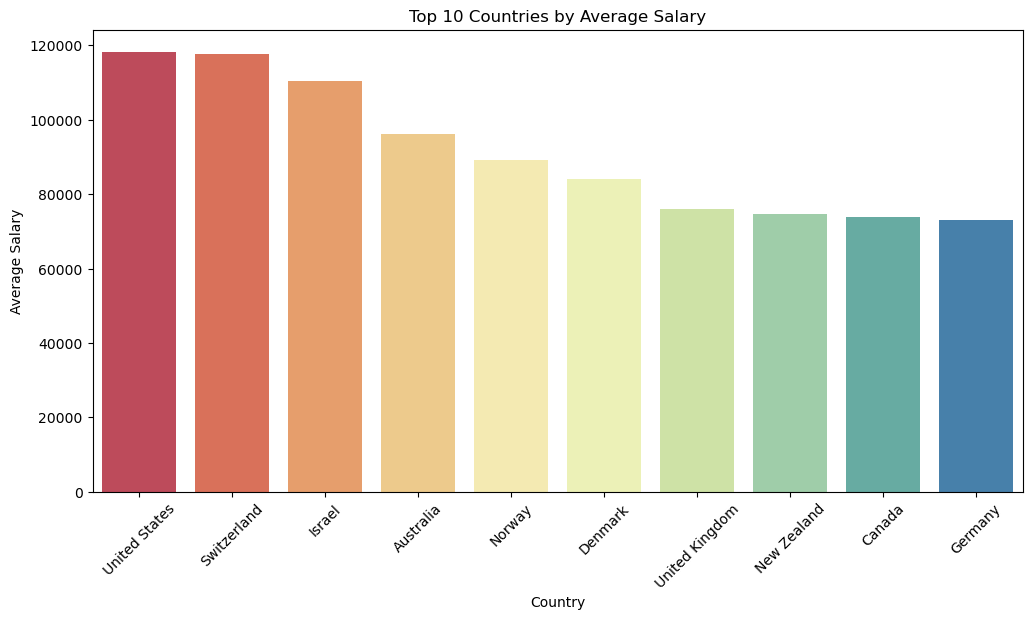

In [71]:
Top_country_salary = df.groupby('Country')['Salary_Midpoint'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=Top_country_salary.index, y=Top_country_salary.values, palette='Spectral')
plt.title('Top 10 Countries by Average Salary')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show();

In [72]:
df_filtered_age.groupby('Age_Group')['Salary_Midpoint'].mean()

Age_Group
18-25   23301.29
36-45   53455.78
45-49   70614.33
46-55   74561.48
60+     80831.38
nan          NaN
Name: Salary_Midpoint, dtype: float64

posx and posy should be finite values
posx and posy should be finite values


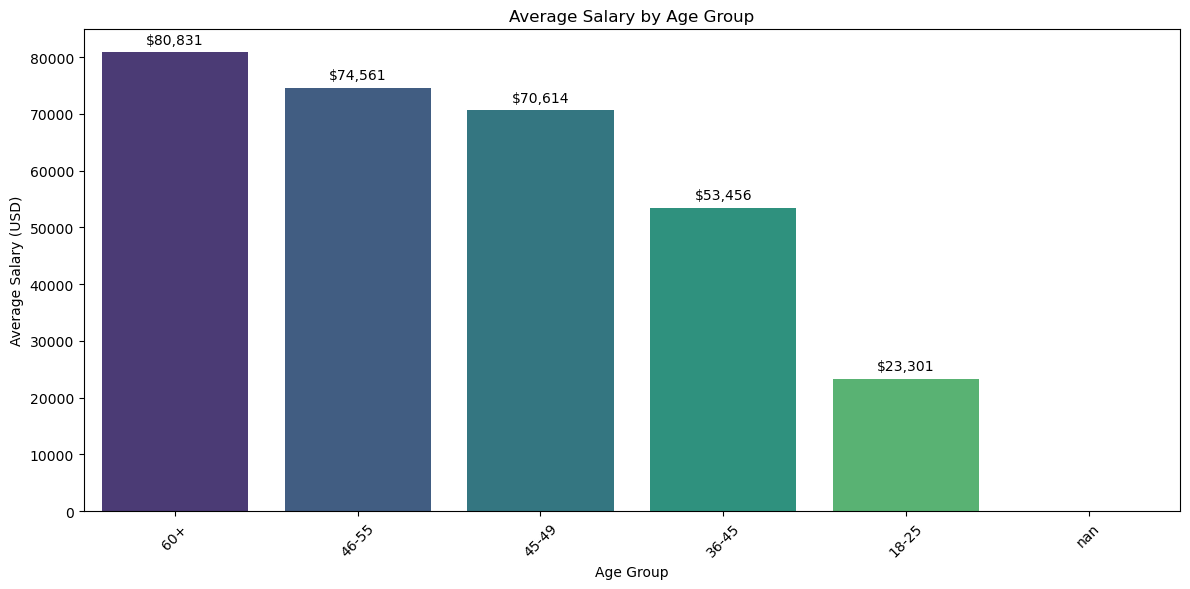

In [73]:
avg_salary_by_age = df_filtered_age.groupby('Age_Group')['Salary_Midpoint'].mean()
avg_salary_by_age = avg_salary_by_age.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_age.index, y=avg_salary_by_age.values, palette='viridis')

plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)

for i, (age_group, salary) in enumerate(avg_salary_by_age.items()):
    plt.text(i, salary + 1000, f'${salary:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show();

In [74]:
df.groupby('Job_Title')['Salary_Midpoint'].unique()

Job_Title
Business Analyst             [65000.0, 8750.0, 22500.0, 137500.0, 112500.0,...
Data Scientist                                                           [nan]
Developer Advocate           [nan, 1000000.0, 500.0, 12500.0, 137500.0, 850...
Machine Learning Engineer    [112500.0, 27500.0, 4500.0, 1500.0, 500.0, 125...
Product Manager              [95000.0, 85000.0, 500.0, 55000.0, 175000.0, n...
Project Manager              [65000.0, 2500.0, 3500.0, 12500.0, 500.0, 2250...
Research Scientist                                                       [nan]
Software Engineer                                                        [nan]
Statistician                 [500.0, 65000.0, 27500.0, 8750.0, 35000.0, 625...
Unemployed                                                               [nan]
Name: Salary_Midpoint, dtype: object

In [75]:
df_filtered_job.groupby('Job_Title')['Salary_Midpoint'].mean().sort_values(ascending=False).head()

Job_Title
Product Manager      75962.01
Developer Advocate   66645.35
Project Manager      61420.28
Business Analyst     38978.24
Statistician         37623.41
Name: Salary_Midpoint, dtype: float64

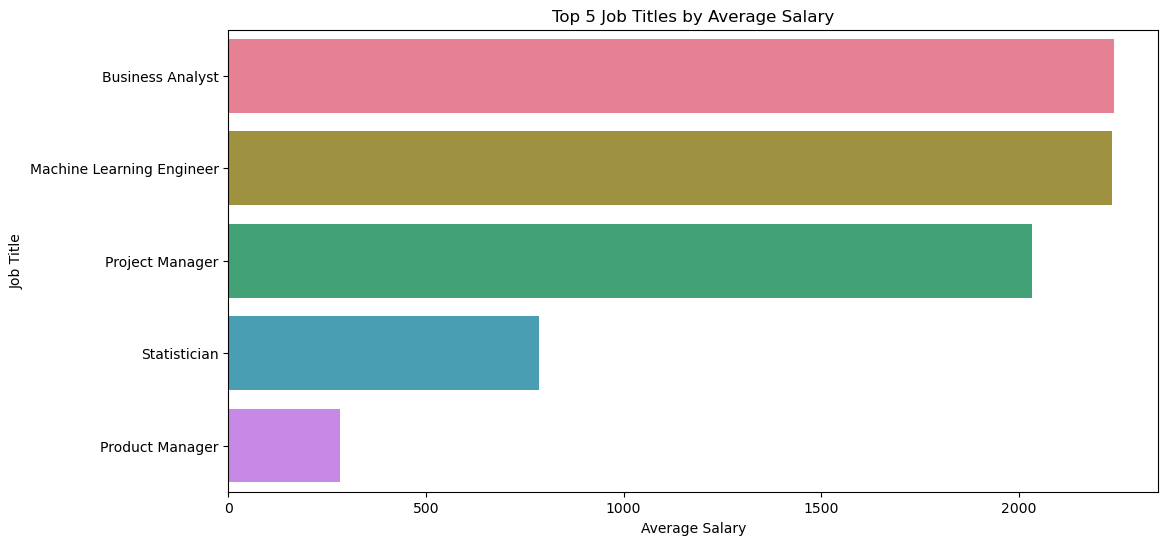

In [76]:
Tob_10_job = df.groupby('Job_Title')['Salary_Midpoint'].count().sort_values(ascending=False).head()
plt.figure(figsize=(12,6))
sns.barplot(x=Tob_10_job.values, y=Tob_10_job.index, palette='husl')
plt.title('Top 5 Job Titles by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show();

## Programming_Experience

In [77]:
df.groupby('Gender')['Programming_Experience'].value_counts()

Gender  Programming_Experience
Female  1-3 Years                  4577
        0-1 Years                  4056
        3-5 Years                  3217
        5-10 Years                 1682
        10+ Years                  1297
        No Experience              1120
Male    1-3 Years                 19525
        0-1 Years                 15076
        3-5 Years                 15064
        10+ Years                 10419
        5-10 Years                 9160
        No Experience              3221
Other   1-3 Years                   348
        10+ Years                   308
        3-5 Years                   306
        0-1 Years                   263
        5-10 Years                  226
        No Experience               109
Name: count, dtype: int64

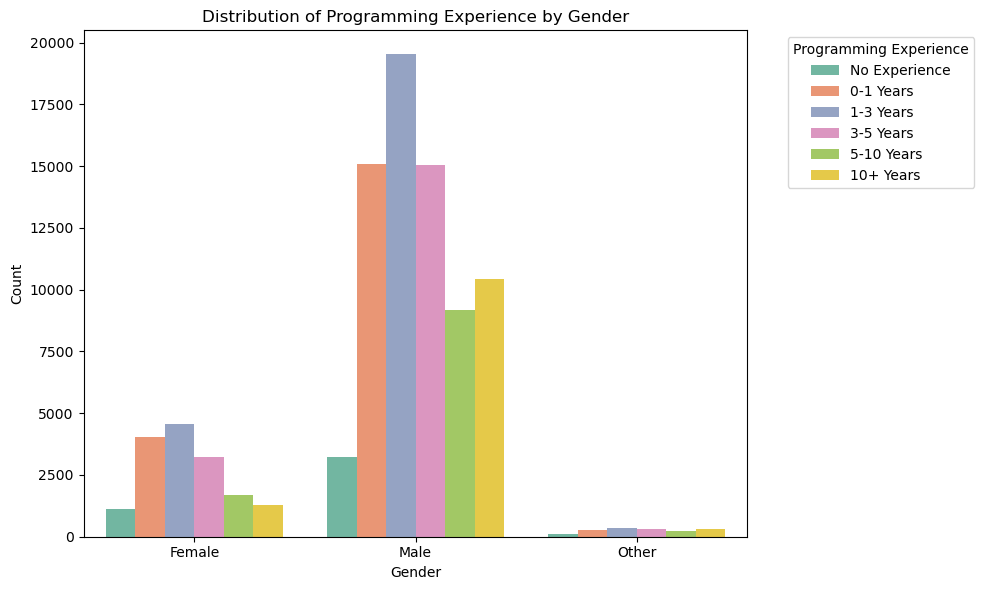

In [78]:
df['Programming_Experience'].value_counts()
experience_order = ['No Experience', '0-1 Years', '1-3 Years', '3-5 Years', '5-10 Years', '10+ Years']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Programming_Experience', order=['Female', 'Male', 'Other'], hue_order=experience_order,palette='Set2')
plt.title("Distribution of Programming Experience by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Programming Experience", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();


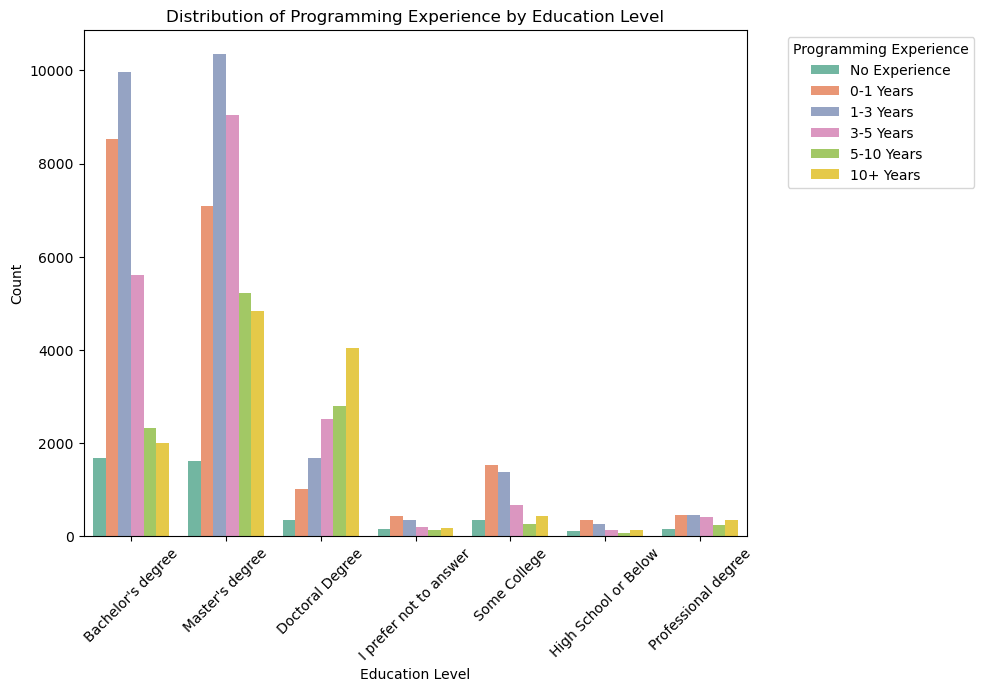

In [79]:
experience_order = ['No Experience', '0-1 Years', '1-3 Years', '3-5 Years', '5-10 Years', '10+ Years']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Programming_Experience', hue_order=experience_order,palette='Set2')
plt.title("Distribution of Programming Experience by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Programming Experience", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show();


## Programming Languages

In [80]:
lang_counts = df_languages.notna().sum().sort_values(ascending=False)


lang_summary = lang_counts.reset_index()
lang_summary.columns = ["language", "count"]

print(lang_summary)


      language  count
0       Python  65942
1          SQL  33090
2            R  20884
3         Java  14402
4   Javascript  12750
5          C++  11618
6            C   9696
7       MATLAB   9320
8         Bash   8737
9        Julia    797
10       Swift    440


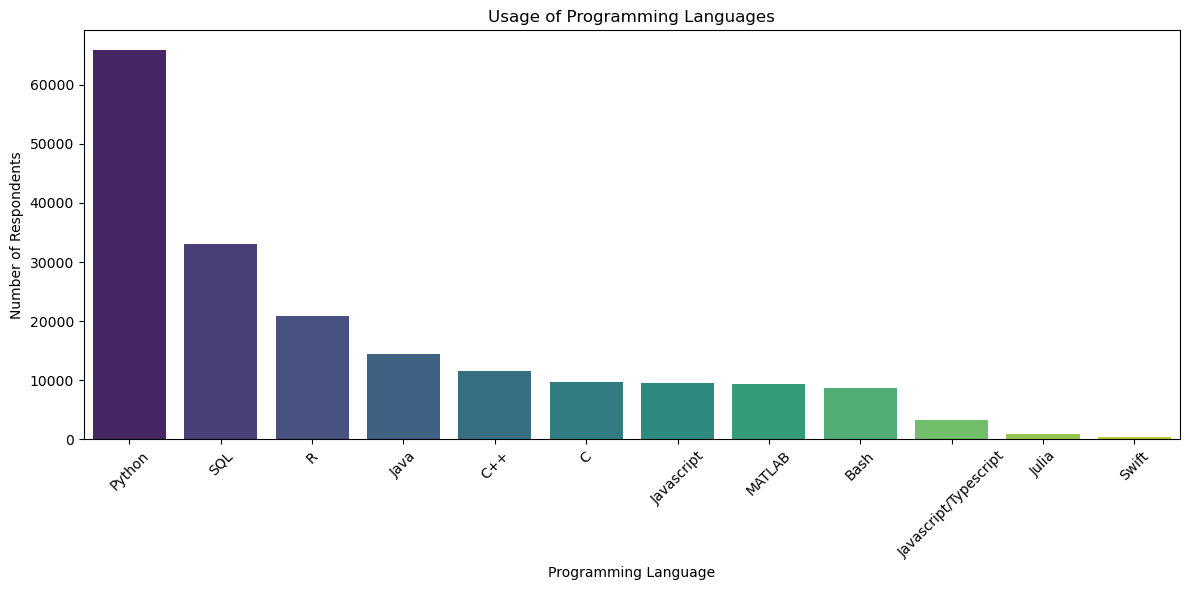

In [81]:
language_counts = df_languages.stack().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Usage of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


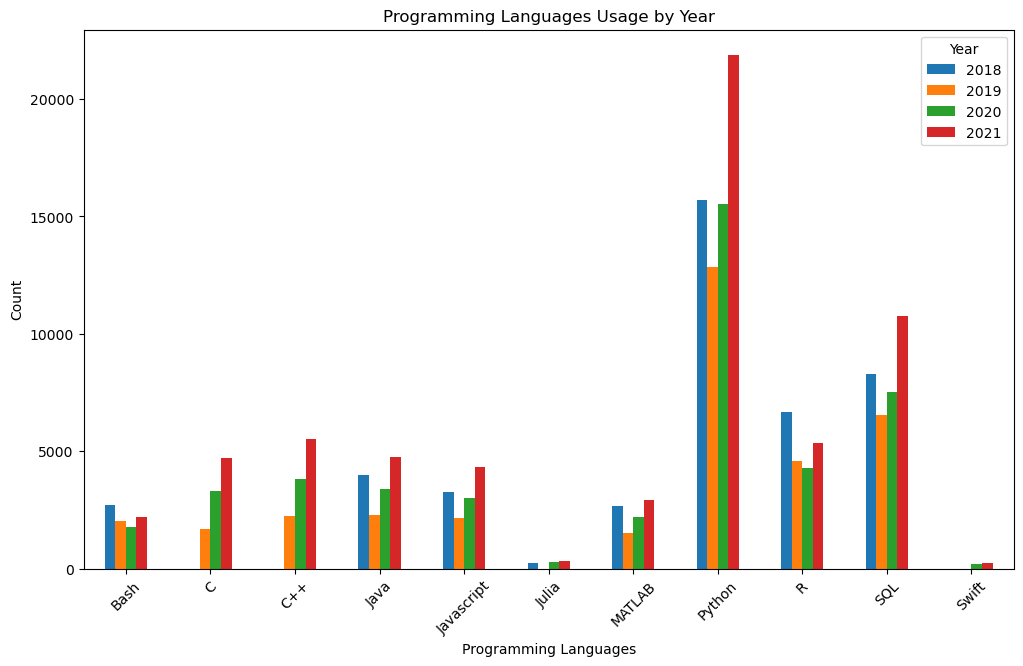

In [82]:
df_langs_by_year = df[['Year'] + language_cols].copy()

df_melted = df_langs_by_year.melt(id_vars='Year', 
                                  value_vars=language_cols, 
                                  var_name='Language', 
                                  value_name='Used')



df_melted = df_melted.dropna()

lang_year_counts = df_melted.groupby(['Year','Language']).size().unstack(fill_value=0)


lang_year_counts.T.plot(kind='bar', figsize=(12,7))
plt.xlabel("Programming Languages")
plt.ylabel("Count")
plt.title("Programming Languages Usage by Year")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.show();



## Most_Recommended_Language

In [83]:
df['Recommended_Language'].value_counts().head(10)

Recommended_Language
Python        64827
R              8602
SQL            4281
C++            1300
C               894
Java            830
MATLAB          828
Other           699
Javascript      340
C/C++/C#        299
Name: count, dtype: int64

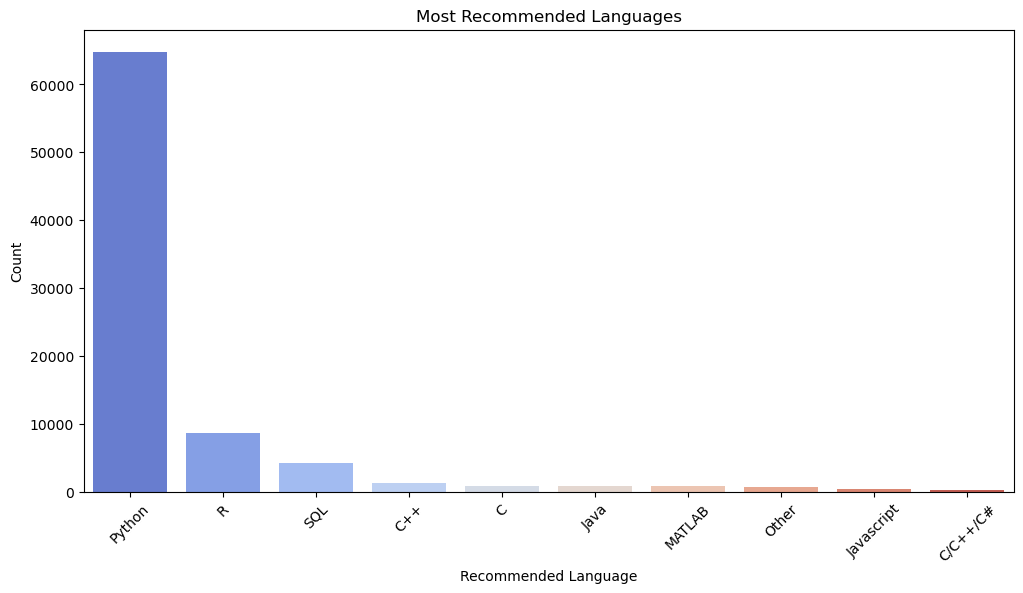

In [84]:
Most_Recommended_Language = df['Recommended_Language'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=Most_Recommended_Language.index, y=Most_Recommended_Language.values,palette='coolwarm')
plt.title('Most Recommended Languages')
plt.xlabel('Recommended Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

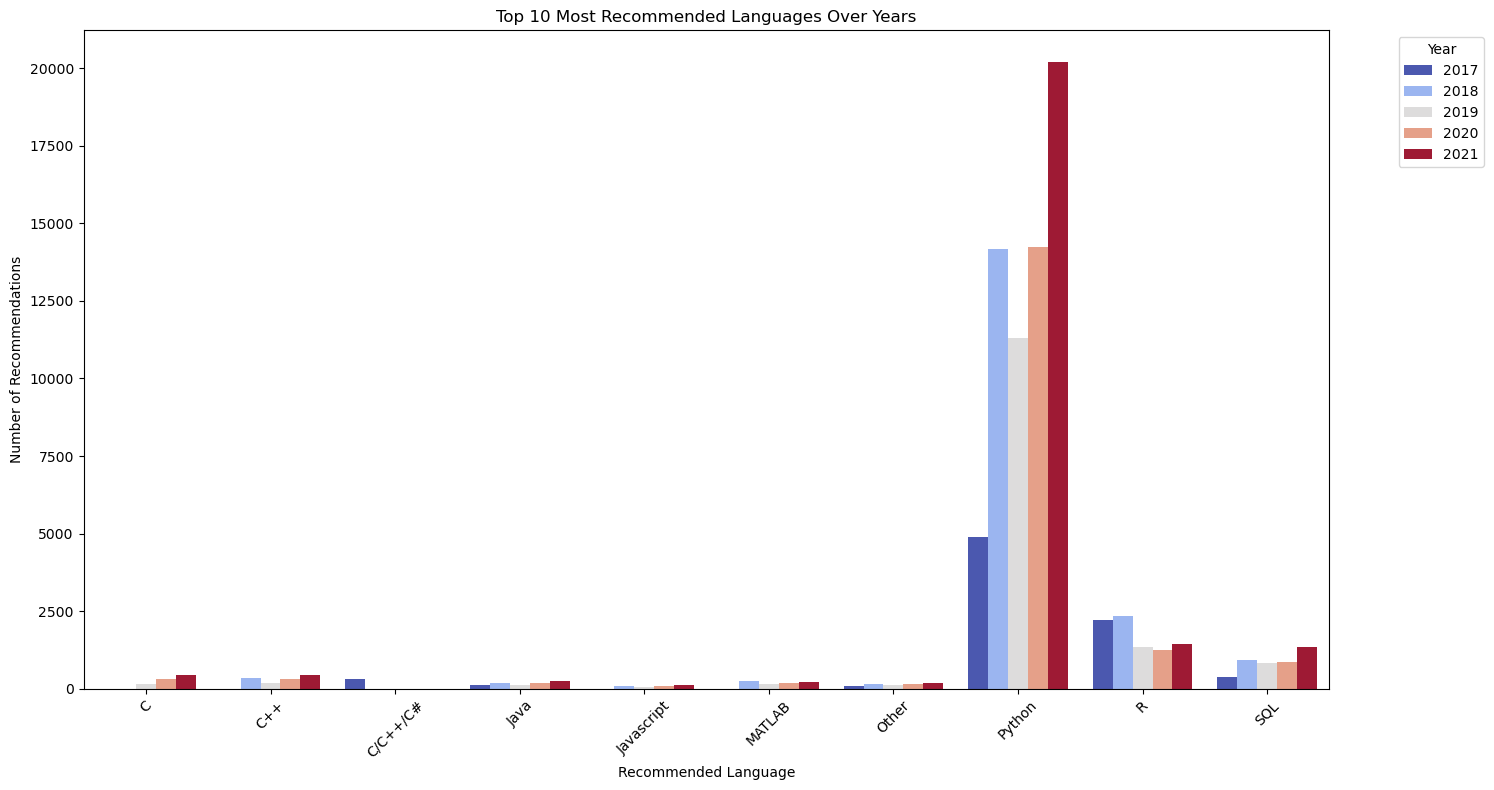

In [85]:
 # حساب تكرار استخدام كل لغة برمجية عبر السنوات
language_year_counts = df.groupby(['Recommended_Language', 'Year']).size().reset_index(name='Count')

# ترتيب اللغات حسب الإجمالي وتحديد أهم 10
top_languages = df['Recommended_Language'].value_counts().head(10).index
language_year_counts_top = language_year_counts[language_year_counts['Recommended_Language'].isin(top_languages)]

# رسم المخطط
plt.figure(figsize=(15, 8))
sns.barplot(data=language_year_counts_top, x='Recommended_Language', y='Count', hue='Year', palette='coolwarm')
plt.title('Top 10 Most Recommended Languages Over Years')
plt.xlabel('Recommended Language')
plt.ylabel('Number of Recommendations')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

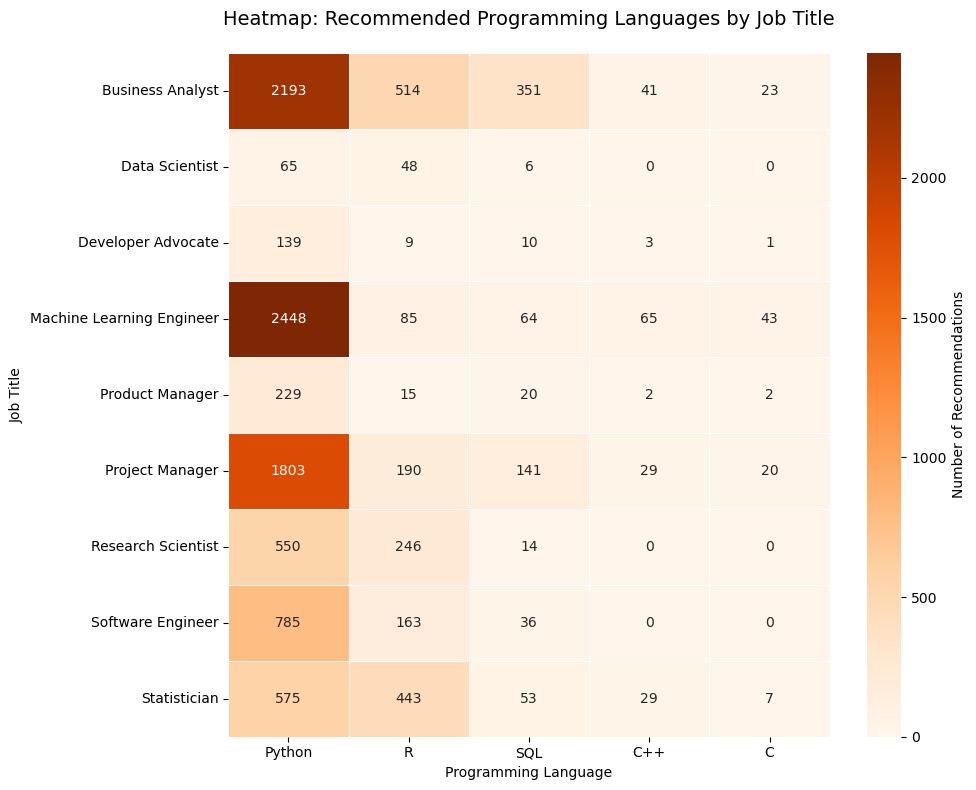

In [86]:
heatmap_data = pd.crosstab(df['Job_Title'], df['Recommended_Language'])

top_10_jobs = df_filtered_job['Job_Title'].value_counts().head(10).index
heatmap_data = heatmap_data[heatmap_data.index.isin(top_10_jobs)]


top_5_languages = df['Recommended_Language'].value_counts().head(5).index
heatmap_data = heatmap_data[top_5_languages]
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,          
    fmt='d',              
    cmap='Oranges',        
    linewidths=0.5,     
    cbar_kws={'label': 'Number of Recommendations'}
)

plt.title('Heatmap: Recommended Programming Languages by Job Title', fontsize=14, pad=20)
plt.xlabel('Programming Language')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show();

## Education

In [87]:
df["Education"].value_counts()

Education
Master's degree           42324
Bachelor's degree         33426
Doctoral Degree           13506
Some College               5284
Professional degree        2350
I prefer not to answer     1787
High School or Below       1329
Name: count, dtype: int64

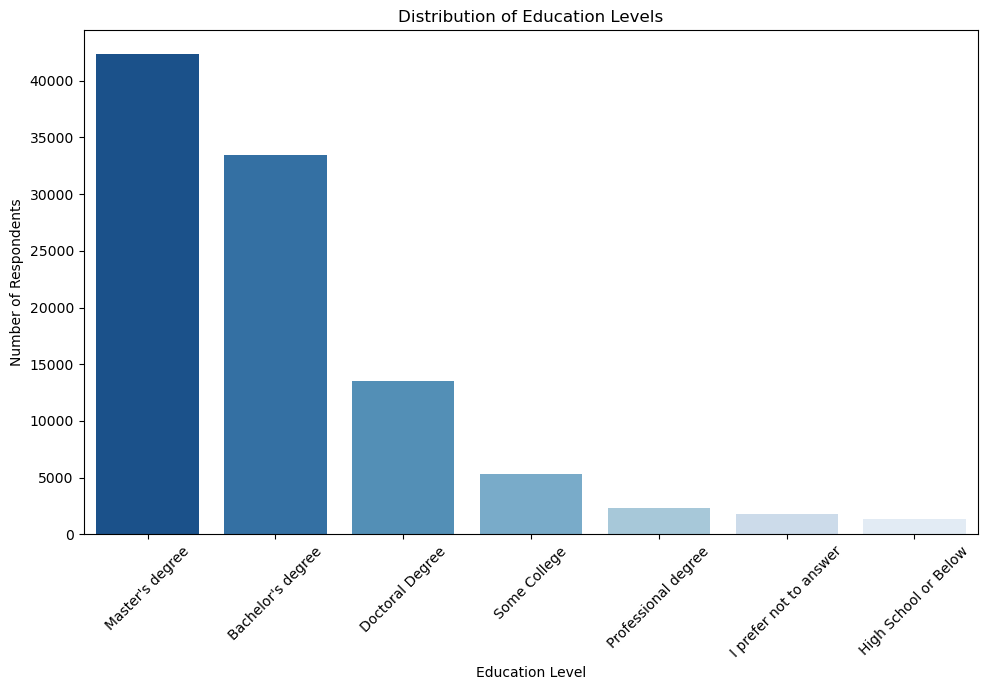

In [88]:
Distrub_by_Edu = df["Education"].value_counts().index
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Education', order=Distrub_by_Edu, palette='Blues_r')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show();


In [89]:
df.groupby('Gender')["Education"].value_counts()

Gender  Education             
Female  Master's degree            8106
        Bachelor's degree          5633
        Doctoral Degree            2638
        Some College                722
        Professional degree         389
        I prefer not to answer      319
        High School or Below        127
Male    Master's degree           33541
        Bachelor's degree         27321
        Doctoral Degree           10577
        Some College               4450
        Professional degree        1922
        I prefer not to answer     1278
        High School or Below       1143
Other   Master's degree             677
        Bachelor's degree           472
        Doctoral Degree             291
        I prefer not to answer      190
        Some College                112
        High School or Below         59
        Professional degree          39
Name: count, dtype: int64

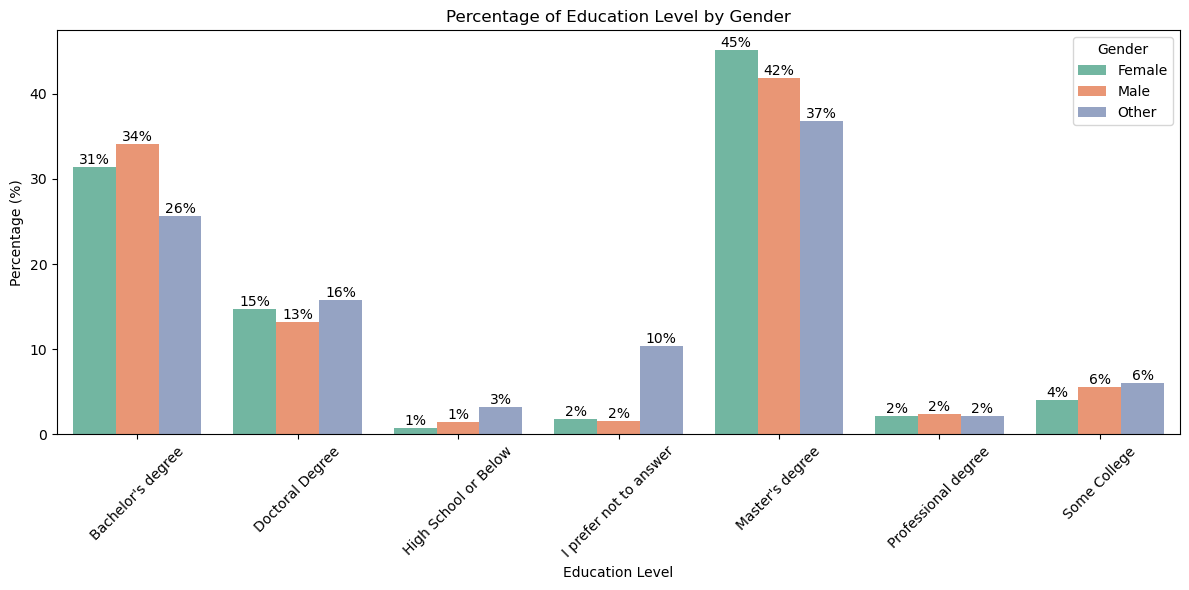

In [90]:
#1. Create a recurring table (Count)

cross_tab = pd.crosstab(df['Gender'], df['Education'], normalize='index') * 100

#2. Convert to long format for drawing

cross_tab = cross_tab.reset_index().melt(id_vars='Gender', var_name='Education', value_name='Percentage')

#3. Graphing percentages
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cross_tab, x='Education', y='Percentage', hue='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', fontsize=10,  )

plt.title("Percentage of Education Level by Gender")
plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show();

## Employer_ML_Adoption

In [91]:
df['Employer_ML_Adoption'].value_counts()

Employer_ML_Adoption
Exploring ML            13243
No ML Usage             12311
Recently Adopted ML     10570
Established ML           9858
I do not know            8382
ML for Insights Only     6612
Name: count, dtype: int64

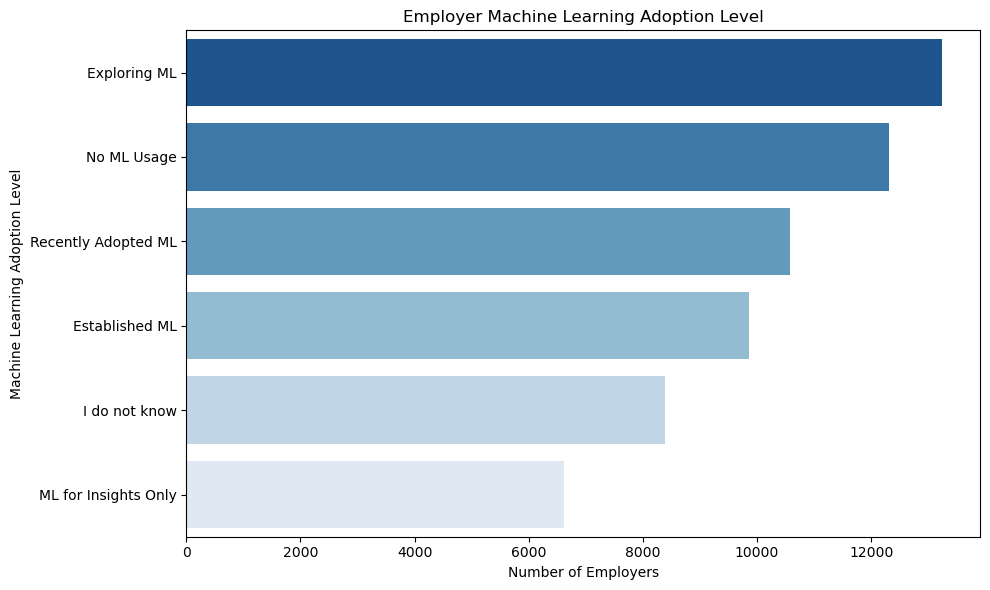

In [92]:
Adop_of_ML = df["Employer_ML_Adoption"].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Employer_ML_Adoption', palette='Blues_r', order=Adop_of_ML)
plt.title('Employer Machine Learning Adoption Level')
plt.xlabel('Number of Employers')
plt.ylabel('Machine Learning Adoption Level')
plt.tight_layout()
plt.show();

# 6. Insights & Recommendations

# State of Data Science: Global Insights (2017–2021)

## Executive Summary

This report analyzes over 100,000 responses from the Kaggle Data Science Survey (2017–2021), revealing key trends in programming languages, gender representation, education, experience, and geographic distribution. Python dominates across all job roles, Asia leads in community participation, and a significant gender and income gap persists—especially in Arab countries. Despite high educational attainment among women and youth, representation and salary equity remain challenges. Strategic investments in education, remote work, and inclusion are critical for equitable global growth in data science.

---

## 1. Python: The Universal Language

### 🔑 Key Insight: Clear Leadership Across Job Roles

**Analysis**  
Python remains the most recommended programming language across diverse job titles—technical, analytical, and managerial—demonstrating unmatched versatility in the data ecosystem.

**Evidence**  
- **Business Analysts** (4,000+ respondents) rank Python as their top language.  
- **Machine Learning Engineers** (≈3,100) and **Data Scientists** rely heavily on Python for AI/ML development.  
- **Software Engineers** and **Project Managers** also show strong adoption, proving its relevance beyond data roles.  
- Specialized roles like **Statisticians** and **Research Scientists** favor Python due to its rich library ecosystem.

Python’s dominance stems from its accessible syntax and powerful libraries such as **Pandas, NumPy, scikit-learn, and TensorFlow**.

**Recommendation**  
Aspiring professionals in data science, AI, or business intelligence should prioritize mastering Python. It serves as the foundational skill, with SQL, R, or Java as valuable complements.



---

## 2. Gender Gap: Talent vs. Representation

### 👥 Significant Imbalance in Participation and Pay

**Analysis**  
The data science community exhibits a pronounced gender gap:  
- **81.7%** of respondents are male.  
- **18.3%** are female.  

This imbalance extends to compensation, where males earn **57.9%** of the average salary versus **42.1%** for females.

**Evidence**  
- Males dominate top roles like **Business Analyst**, **ML Engineer**, and **Project Manager**.  
- Women show higher educational attainment: **45%** hold a Master’s degree vs. **42%** of men.  
- Despite this, women remain underrepresented in the workforce and underpaid.

**Recommendation**  
- Implement targeted recruitment to increase female participation.  
- Enforce **equal pay policies** and transparency in compensation.  
- Launch **mentorship programs** to support career advancement for women.



---

## 3. Education & Experience: The Salary Multiplier

### 📈 Direct Correlation with Income

**Analysis**  
Salary levels rise significantly with both **experience** and **education**.

**Key Findings**  
| Experience Level     | Average Salary |
|----------------------|----------------|
| Entry-Level (0–2 yrs) | $12,499        |
| Mid-Career (3–5 yrs)  | $39,748        |
| Experienced (10+ yrs) | $62,242        |

- Professionals with a **Master’s degree** earn an average of **$54,449**.  
- Global average salary: **$45,074**  
- Arab countries average: **$19,813**

**Evidence**  
A clear positive correlation exists between education, experience, and income. However, regional disparities highlight structural inequalities.

**Recommendation**  
- Invest in **higher education** and **on-the-job training**.  
- Companies should expand **vocational programs** to accelerate career progression.  
- Governments and institutions should support lifelong learning initiatives.



---

## 4. Geography: Asia Leads, Arab World Lags

### 🌍 Participant Distribution by Region

**Analysis**  
Asia dominates global participation in data science:  
- **India**: 23,000 participants  
- **China**: 10,000 participants  
- **United States**: 15,000 participants  

Together, India and China surpass the U.S. in community size.

**Evidence**  
- Top three countries by participation: India, China, USA.  
- **Arab countries** total only **1,200 participants**, with **Egypt** leading regionally.

This reflects a strong talent pool in Asia and growing interest in data fields.

**Recommendation**  
- Foster **international collaboration** between leading and emerging markets.  
- Support **knowledge-sharing platforms** to transfer best practices.  
- Invest in **local data science communities** in underrepresented regions.



---

## 5. Challenges in Arab Countries

### 📉 Economic and Social Barriers

**Analysis**  
Arab countries face a dual challenge:  
- **Low average salary**: $19,813 (less than 50% of global average).  
- **Gender imbalance**: Only **18.4%** female participation.  

**Evidence**  
- **~80%** of participants are male.  
- **50%** of respondents from the region are **students**, indicating a young, developing talent pool.

Despite potential, structural and economic barriers limit professional growth and global integration.

**Recommendation**  
- Promote **remote employment** to connect local talent with international opportunities.  
- Develop **regulatory frameworks** supporting digital nomadism and cross-border work.  
- Launch **scholarships and bootcamps** tailored to Arab youth and women.

---

## 6. Strategic Recommendations

To build a more inclusive, skilled, and globally connected data science community:

✅ **Professional Development**  
- Prioritize Python training in academic and corporate curricula.

✅ **Gender Empowerment**  
- Launch inclusion initiatives and mentorship networks for women.

✅ **Investment in Education**  
- Expand access to Master’s programs and vocational training.

✅ **International Collaboration**  
- Encourage partnerships between Asian, Western, and Arab institutions.

✅ **Remote Work Enablement**  
- Advocate for policies that support global freelance and remote roles.

---

📌 **Year of Analysis**: 2017 – 2021  
📊 **Data Source**: Kaggle Machine Learning & Data Science Survey (2017–2021)  
🎯 **Goal**: Inform policy, education, and career development in the digital economy.